# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [33]:
import cv2
import dlib
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

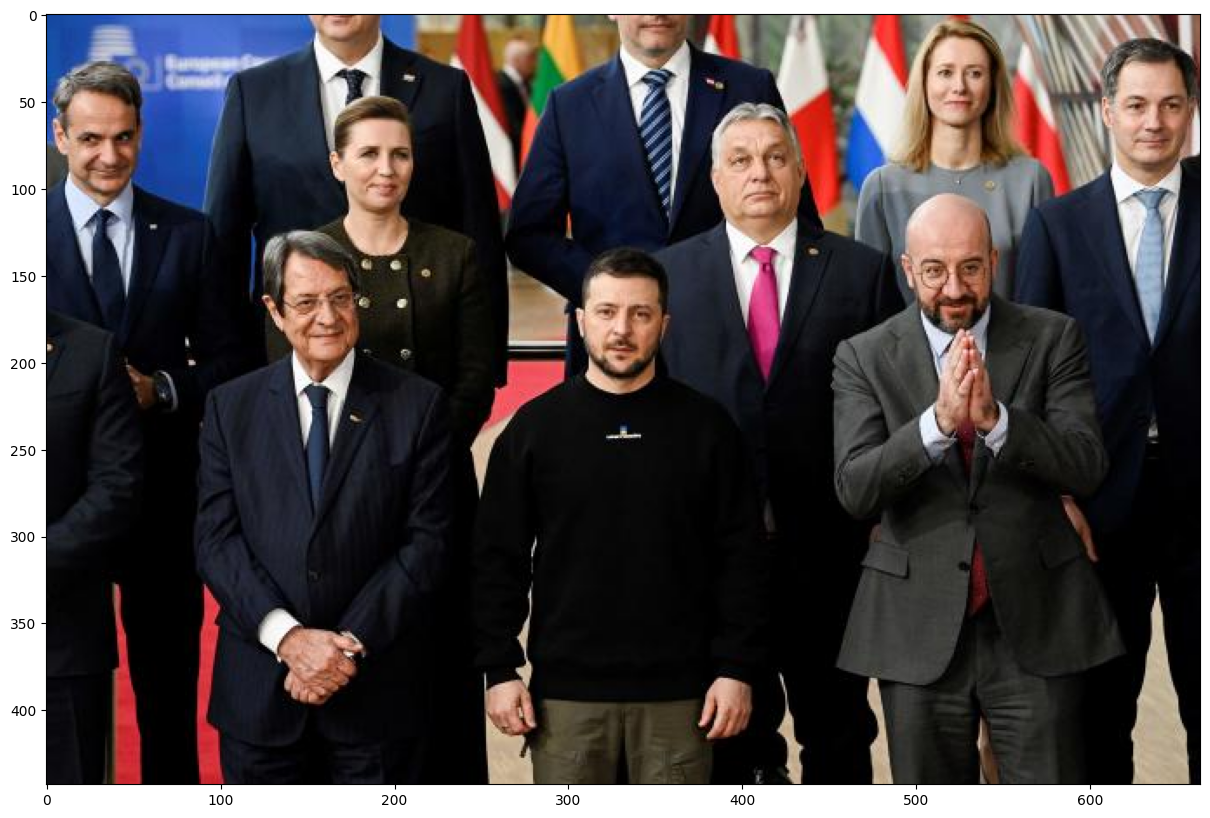

In [34]:
img = cv2.imread('../data/eu_summit.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

### Step 2

Load the dlib face predictor.

In [35]:
# Load the face detector from dlib
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [36]:
# Use the detector to find the bounding boxes of the faces
detected_faces = detector(img, 1)  # 1 --> upsampling factor

# Print the number of detected faces
print(f"Number of faces detected: {len(detected_faces)}")

Number of faces detected: 8


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

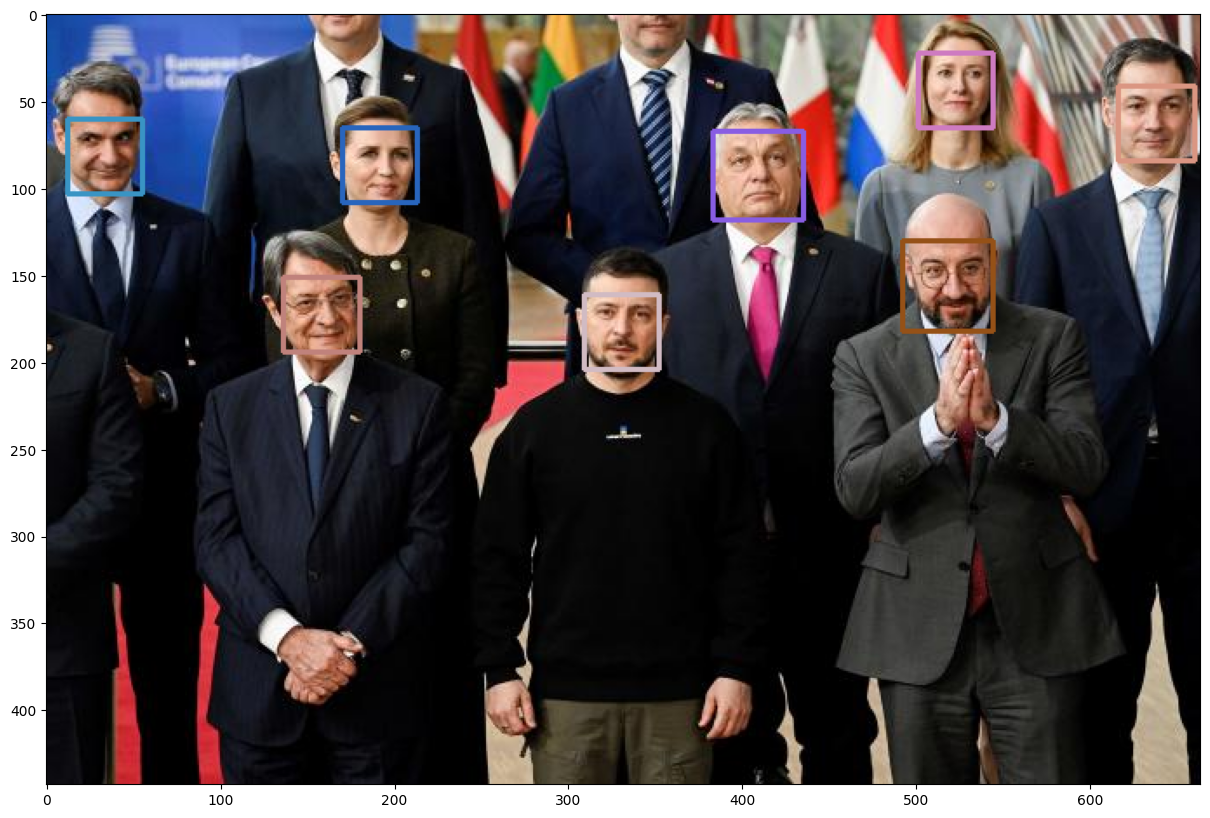

In [37]:
# Generate a list of unique colors for each detected face
colors = []
for _ in range(len(detected_faces)):
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    colors.append(color)

# Loop through the detected faces and draw bounding boxes
for i, face_rect in enumerate(detected_faces):
    x1 = face_rect.left()
    y1 = face_rect.top()
    x2 = face_rect.right()
    y2 = face_rect.bottom()

    # Draw a rectangle with OpenCV, with a unique color for each face
    cv2.rectangle(img, (x1, y1), (x2, y2), colors[i], 2)
    
plt.imshow(img, cmap='gray')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

Number of faces detected: 28


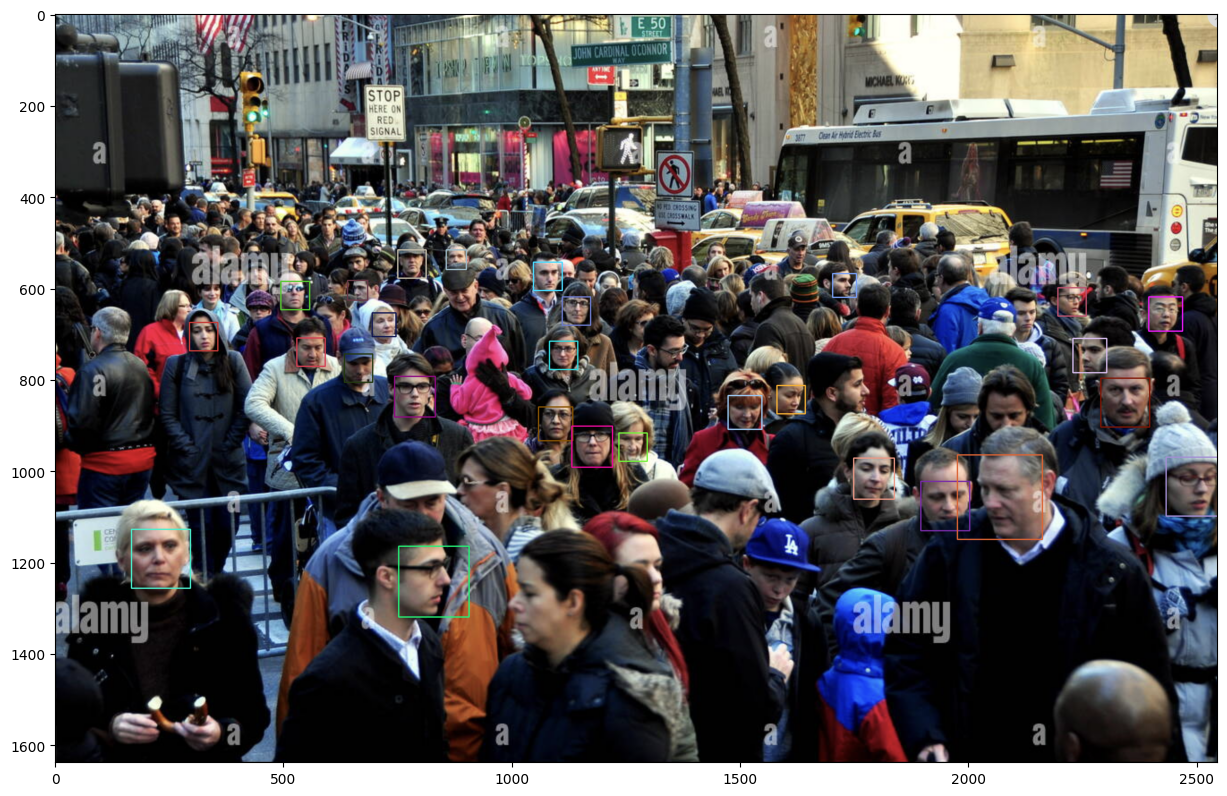

In [42]:
def detect_faces_and_draw_boxes(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    detected_faces = detector(img, 1)
    print(f"Number of faces detected: {len(detected_faces)}")
    
    colors = []
    for _ in range(len(detected_faces)):
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        colors.append(color)

    for i, face_rect in enumerate(detected_faces):
        x1 = face_rect.left()
        y1 = face_rect.top()
        x2 = face_rect.right()
        y2 = face_rect.bottom()
        cv2.rectangle(img, (x1, y1), (x2, y2), colors[i], 2)
    
    return img

img = detect_faces_and_draw_boxes("../data/1.png")
plt.imshow(img, cmap='gray')

A: It detected around 80% of what I was expecting it to detect, so I would say it's pretty robust. It detected 28 faces on this busy NY street, including people with rather small distant faces, glasses, hats etc.